# Assignment 9

Name : Ghanashyam Patil  
Roll No : 31162  
Subject : DSBDAL

Problem Statement :
1. Implement naive bayes classification algorithm using Python to perform classification on a given dataset.
2. Compute Confusion Matrix of findTP,FP,TN,FN,Accuracy, Error Rate, Precision,Recall on the given dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [18]:
data = pd.read_csv('../Databases/iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
# After applying Label Encoding with LabelEncoder() our categorical value will replace with the numerical value[int].
le=LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

LabelEncoder()

In [35]:
sp=data['Species']
data['Species']=le.transform(sp)

In [95]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

# Removing Null Values

In [22]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
numeric_cols = data.select_dtypes(include='number')
for column in numeric_cols:
         data[column]=data[column].fillna(data[column].mean())
            
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Naive Bayes Classification

In [38]:
# Select the features (X) and target variable (y)
X = data.drop('Species', axis='columns')
y = data['Species']

In [99]:
X.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [98]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 5), (38, 5), (112,), (38,))

In [43]:
# Create a Naive Bayes classifier
model = GaussianNB()

In [44]:
# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [45]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
print("Predicted Prices : ",y_pred)

Predicted Prices :  [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


In [51]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

# Confusion Matrix

In [67]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


In [83]:
np.sum(conf_matrix, axis=1)

[13 13 12]


<Axes: >

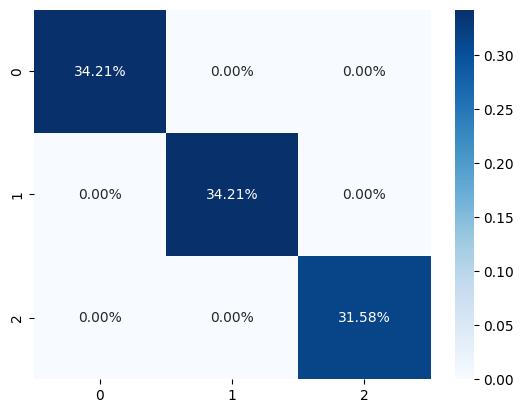

In [62]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [102]:
# Function to Extract TP, FP, TN, FN from the confusion matrix

def get_metrics(class_no,conf_matrix):
    row_sums=np.sum(conf_matrix, axis=1)
    col_sums=np.sum(conf_matrix, axis=0)
    TP = conf_matrix[class_no][class_no]
    FP = row_sums[class_no] - conf_matrix[class_no][class_no] 
    FN = col_sums[class_no] - conf_matrix[class_no][class_no]
    TN = np.sum(conf_matrix) - TP - FP - FN
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    return TP, FP, FN, TN, precision, recall,accuracy


In [104]:
# Compute additional performance metrics for Setosa
TP0, FP0, FN0, TN0, precision0, recall0 ,accuracy0 = get_metrics(0,conf_matrix)
error_rate0=1-accuracy0;

print("For Class Setosa")
print("TP : ", TP0)
print("FP : ", FP0)
print("FN : ", FN0)
print("TN : ", TN0)

# Print the performance metrics
print("Accuracy:", accuracy0)
print("Error Rate:", error_rate0)
print("Precision:", precision0)
print("Recall:", recall0)

For Class Setosa
TP :  13
FP :  0
FN :  0
TN :  25
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


In [106]:
# Compute additional performance metrics for Versicolor
TP1, FP1, FN1, TN1, precision1, recall1 ,accuracy1 = get_metrics(1,conf_matrix)
error_rate1=1-accuracy1;

print("For Class Versicolor")
print("TP : ", TP1)
print("FP : ", FP1)
print("FN : ", FN1)
print("TN : ", TN1)
# Print the performance metrics
print("Accuracy:", accuracy1)
print("Error Rate:", error_rate1)
print("Precision:", precision1)
print("Recall:", recall1)

For Class Virginica
TP :  13
FP :  0
FN :  0
TN :  25
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


In [107]:
# Compute additional performance metrics for Versicolor
TP2, FP2, FN2, TN2, precision2, recall2 ,accuracy2 = get_metrics(2,conf_matrix)
error_rate2=1-accuracy2;

print("For Class Virginica")
print("TP : ", TP2)
print("FP : ", FP2)
print("FN : ", FN2)
print("TN : ", TN2)
# Print the performance metrics
print("Accuracy:", accuracy2)
print("Error Rate:", error_rate2)
print("Precision:", precision2)
print("Recall:", recall2)

For Class Virginica
TP :  12
FP :  0
FN :  0
TN :  26
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
